In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing my classes
from kmeans import KMeans, KMeansPP, find_k
from hierarchical import Hierarchical
from spectral import Spectral
from common import *

In [138]:
data = pd.read_csv('../data/dane_2D_8.txt', sep='\t',header=None)
# print(data)
#print last column
data_k = len(data[data.columns[-1]].unique())

data_pos = data.drop(data.columns[-1], axis=1).values

# normalize data

data_pos = (data_pos - data_pos.min(axis=0)) / (data_pos.max(axis=0) - data_pos.min(axis=0))

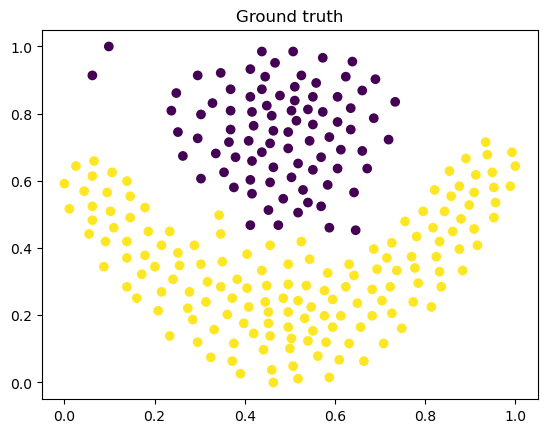

<Figure size 640x480 with 0 Axes>

In [139]:
# ground truth

data_gt = data[2].values

# plot ground truth
plt.scatter(data_pos[:, 0], data_pos[:, 1], c=data_gt)
plt.title('Ground truth')
plt.show()

# clear plot
plt.clf()


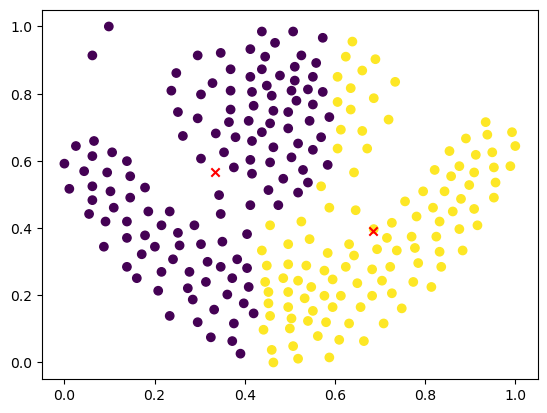

MovieWriter ffmpeg unavailable; using Pillow instead.


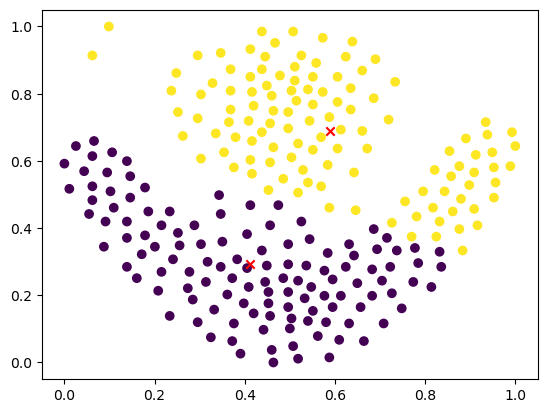

/Users/michalhoffmann/Desktop/studia/mpum/MPUM_mini4/code/kmeans.py:109: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax = plt.axes(xlim=self.X_rangex, ylim=self.X_rangey)
/Users/michalhoffmann/Desktop/studia/mpum/MPUM_mini4/code/kmeans.py:109: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax = plt.axes(xlim=self.X_rangex, ylim=self.X_rangey)
MovieWriter ffmpeg unavailable; using Pillow instead.


In [140]:
# KMeans

kmeans = KMeans(data_k, 'manhattan')
kmeans.fit(data_pos)
kmeans.plot_clusters()

kmeans.plot_history()

kmeans_pp = KMeansPP(data_k, 'euclidean')
kmeans_pp.fit(data_pos)
kmeans_pp.plot_clusters()

kmeans_pp.plot_history()

200 clusters left
100 clusters left


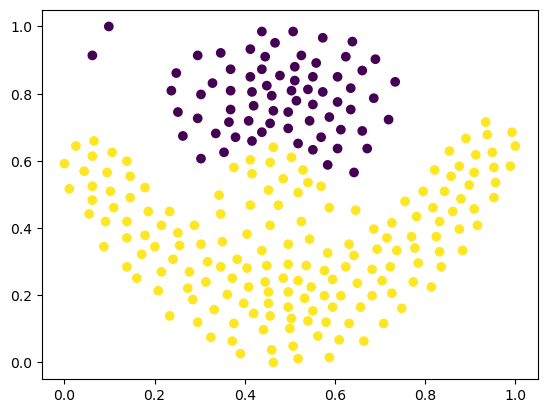

/Users/michalhoffmann/Desktop/studia/mpum/MPUM_mini4/code/hierarchical.py:156: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax = plt.axes(xlim=self.Xrangex, ylim=self.Xrangey)
/Users/michalhoffmann/Desktop/studia/mpum/MPUM_mini4/code/hierarchical.py:156: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax = plt.axes(xlim=self.Xrangex, ylim=self.Xrangey)
MovieWriter ffmpeg unavailable; using Pillow instead.


Animating last 8 merges


In [149]:
# Hierarchical
hierarchical = Hierarchical(k=data_k, metric='manhattan', linkage='complete', track_below=max(10, 2*data_k))

hierarchical.fit(data_pos)

hierarchical.plot_clusters()


hierarchical.animate()

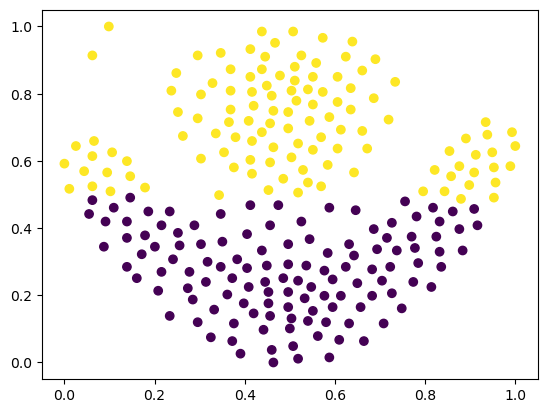

In [142]:
# Testing spectral clustering

spectral = Spectral(data_k,'manhattan')

spectral.fit(data_pos)

spectral.plot_clusters()


In [150]:
# Comparing results

K_means = kmeans.get_clusters()
K_means_pp = kmeans_pp.get_clusters()
hier_res = hierarchical.get_clusters()
spec_res = spectral.get_clusters()
true_clusters = data[2].values

print("KMeans vs KMeans++: ", compare_clustering(K_means, K_means_pp))

print("KMeans vs Hierarchical: ", compare_clustering(K_means, hier_res))

print("KMeans vs Spectral: ", compare_clustering(K_means, spec_res))

print("KMeans++ vs Hierarchical: ", compare_clustering(K_means_pp, hier_res))

print("KMeans++ vs Spectral: ", compare_clustering(K_means_pp, spec_res))

print("Hierarchical vs Spectral: ", compare_clustering(hier_res, spec_res))

print("True vs km, km++, hierarchical, spectral: ", compare_clustering(true_clusters, K_means), compare_clustering(true_clusters, K_means_pp), compare_clustering(true_clusters, hier_res), compare_clustering(true_clusters, spec_res))

KMeans vs KMeans++:  0.5291666666666667
KMeans vs Hierarchical:  0.7041666666666667
KMeans vs Spectral:  0.6458333333333334
KMeans++ vs Hierarchical:  0.8083333333333333
KMeans++ vs Spectral:  0.8833333333333333
Hierarchical vs Spectral:  0.8083333333333333
True vs km, km++, hierarchical, spectral:  0.6708333333333333 0.8583333333333333 0.9333333333333333 0.8416666666666667


In [144]:
# # testing cluster tester

# cl_A = hierarchical.get_clusters()

# cl_B = cl_A.copy()
# # change all zeros to 5
# cl_B[cl_B == 0] = 5

# #change random items to 0
# for _ in range(5):
#     cl_B[np.random.randint(0, len(cl_B))] = 0
#     cl_A[np.random.randint(0, len(cl_A))] = 18

# print(compare_clustering(cl_A, cl_B))

In [145]:
# # Search for best k in KMeans

# k = find_k(data_pos, 3*data_k, 'euclidean')

# print(data_k, k)